## **GROUP - 13**

## **Kabir Chaturvedi, Monisha Patro, Nigel Mills**

### **Visualizing Airbnb Rentals in New York City**


Dataset link from Kaggle: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

This notebook analyzes Airbnb data in New York City to uncover patterns, trends, and insights.
We utilize visualization and machine learning techniques to explore factors like pricing,
neighborhood distribution, and listing characteristics.

## 1. Install Required Libraries

The following libraries are installed for this project:
- **Altair**: Used for interactive visualizations.
- **UMAP**: A dimensionality reduction tool for exploring patterns in the data.

In [1]:
!pip install altair
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.1 MB/s eta 0:00:00


## 2. Import Libraries

We import necessary libraries for:
- **Data Handling**: Pandas and NumPy
- **Visualization**: Matplotlib, Seaborn, and Altair
- **Machine Learning**: PCA (Principal Component Analysis) and UMAP
- **Image Handling**: Requests and PIL


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from io import BytesIO
import requests
from PIL import Image

## 3. Load the Dataset and NYC Map

- **Dataset**: `AB_NYC_2019.csv`, containing Airbnb listings for New York City.
- **NYC Map**: Used as a background for visualizations to provide geographic context.

We ensure that the data loads correctly for further analysis.


In [6]:
# Load the dataset
df = pd.read_csv('/content/AB_NYC_2019.csv')
nyc_map = Image.open('/content/New_York_City.png').convert("L")

## 4. Data Overview

We explore the dataset to understand its structure:
- **Columns**: Features like price, neighborhood, room type, and availability.
- **Summary Statistics**: Key statistics for numeric columns to identify trends.
- **Missing Data**: Check for null values.


In [7]:
# Handle missing values
df['reviews_per_month'].fillna(0, inplace=True)
df.dropna(subset=['name', 'host_name', 'room_type', 'neighbourhood_group'], inplace=True)

<ipython-input-7-6f719fb36fdf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


## 5. Data Cleaning

We perform the following cleaning steps:
1. Fill missing values in critical fields.
2. Drop irrelevant columns or rows if necessary.
3. Standardize column data types for consistency.


In [8]:
# Ensure categorical data is properly formatted
df['room_type'] = df['room_type'].astype('category')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')

## 6. Exploratory Data Analysis (EDA)

We explore the following:
- **Price Distribution**: Compare prices across boroughs.
- **Room Types**: Visualize room types available in each neighborhood group.
- **Listing Density**: Plot geographic distribution of Airbnb listings.


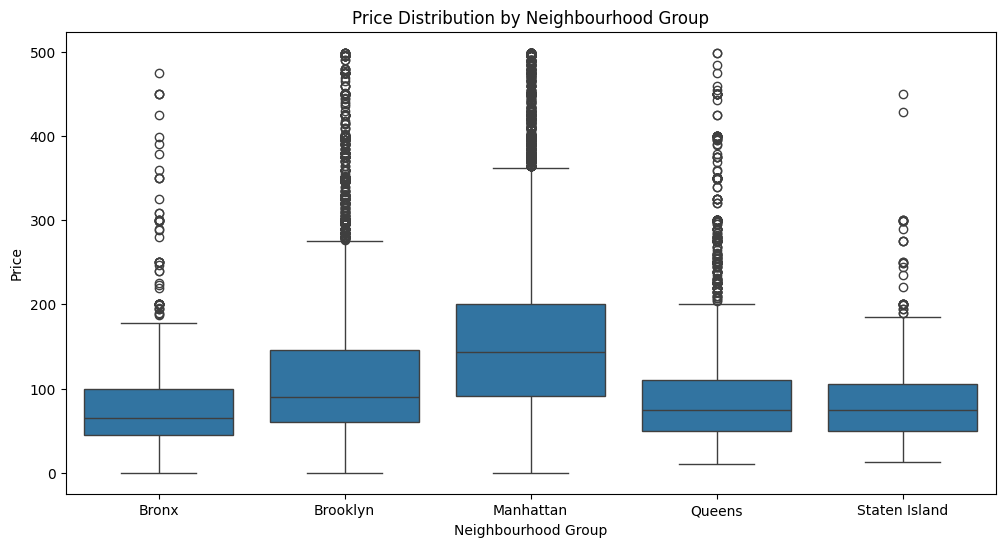

In [9]:
# Exploratory Data Analysis with boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price'] < 500])
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

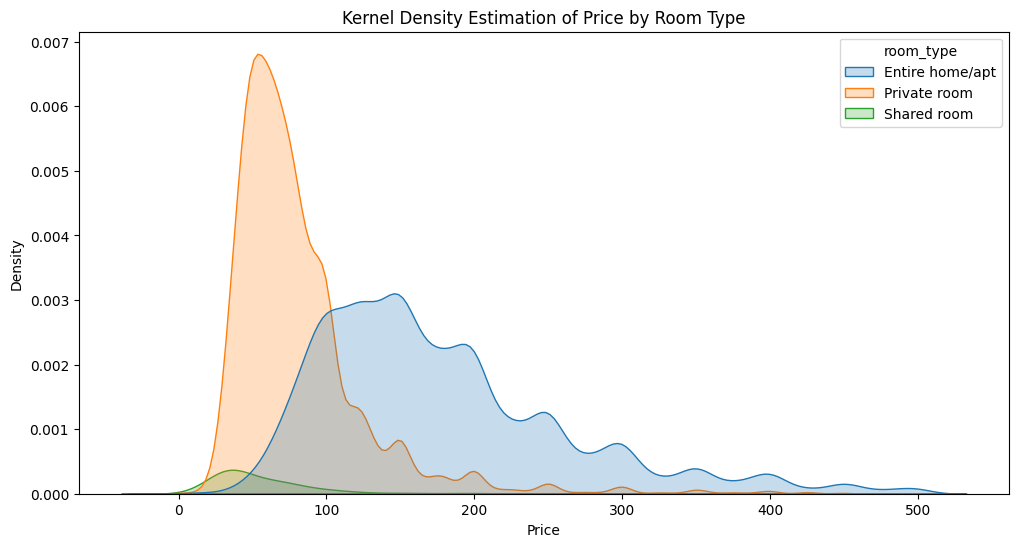

In [10]:
# KDE plot of price distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['price'] < 500], x='price', hue='room_type', fill=True)
plt.title('Kernel Density Estimation of Price by Room Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

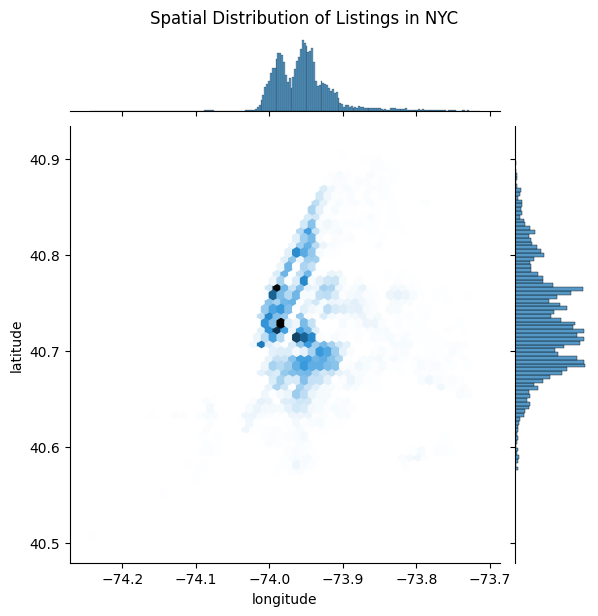

In [11]:
# Jointplot with Hexbin density plot
sns.jointplot(x='longitude', y='latitude', data=df, kind='hex', gridsize=50)
plt.suptitle('Spatial Distribution of Listings in NYC', y=1.02)
plt.show()

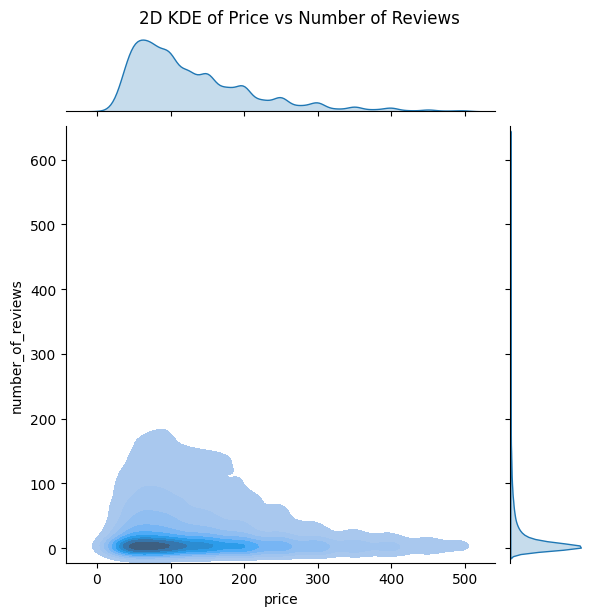

In [12]:
# Jointplot with 2D KDE
sns.jointplot(x='price', y='number_of_reviews', data=df[df['price'] < 500], kind='kde', fill=True)
plt.suptitle('2D KDE of Price vs Number of Reviews', y=1.02)
plt.show()

## 7. Dimensionality Reduction

We apply:
- **PCA**: To reduce high-dimensional data into a few principal components.
- **UMAP**: For non-linear dimensionality reduction to reveal patterns.

These techniques help us visualize clusters in the dataset based on multiple variables.


In [13]:
# Perform PCA on numerical features
features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
x = df[features].fillna(0)
x_scaled = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

In [14]:
# UMAP for high-dimensional visualization
umap = UMAP(n_neighbors=50, min_dist=0.3, random_state=42)
embedding = umap.fit_transform(x_scaled)
df_umap = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## 8. Visualizing Results

We visualize the output from PCA and UMAP to identify clusters and trends.
- **PCA Scatter Plot**: Highlights linear relationships.
- **UMAP Scatter Plot**: Captures non-linear structures in the data.


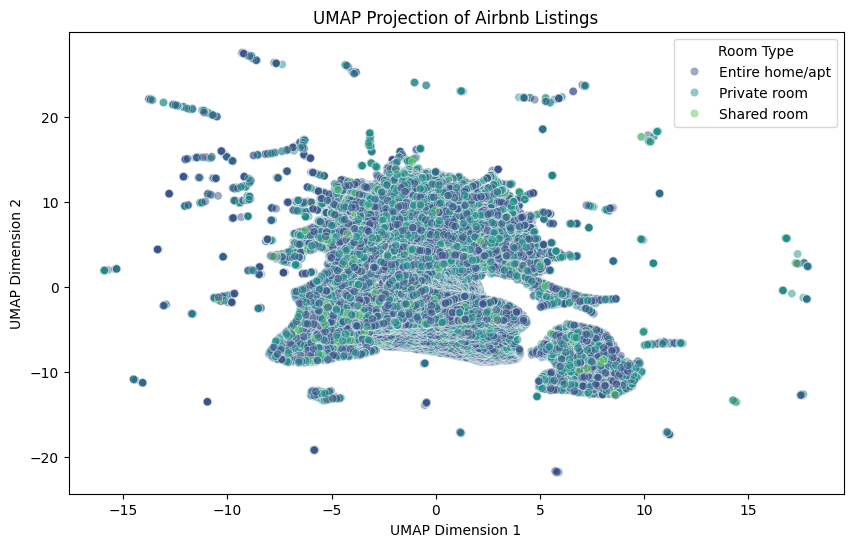

In [15]:
# Visualize UMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=df_umap, hue=df['room_type'], palette='viridis', alpha=0.5)
plt.title('UMAP Projection of Airbnb Listings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Room Type')
plt.show()

## 9. Handling multi-dimensional data




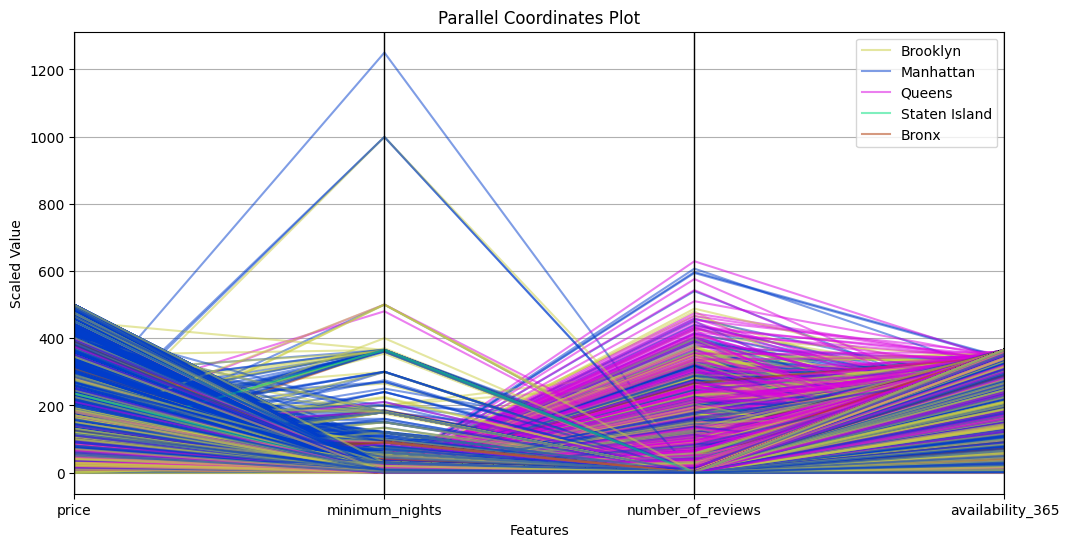

In [17]:
# Parallel coordinates plot
from pandas.plotting import parallel_coordinates
df_parallel = df[['neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]
df_parallel = df_parallel[df_parallel['price'] < 500]

# colorlist = ["#B8BA86", "#5773B5", "#9A689C", "#36B57E", "#D1693D"]
# colorlist_bold = ["#CACE43", "#003DCC", "#D900E0", "#00E07F", "#AD3400"]

color_list = [colors[neighbourhood] for neighbourhood in df_parallel['neighbourhood_group']]

plt.figure(figsize=(12, 6))
parallel_coordinates(df_parallel, 'neighbourhood_group', color = colorlist_bold, alpha=0.5)
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.show()

## 10. Overlay data on NYC map

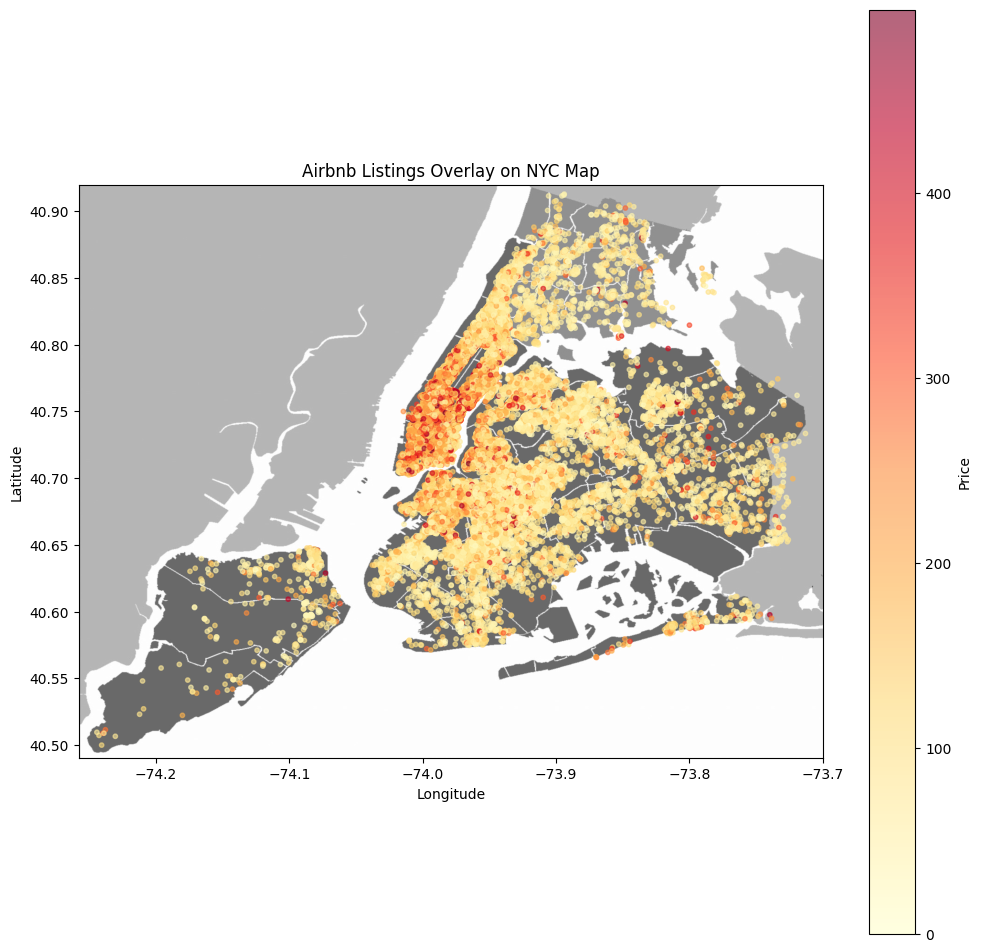

In [18]:
# Overlay data on NYC map with quantitative colormap
plt.figure(figsize=(12, 12))
plt.imshow(nyc_map, extent=[-74.258, -73.7, 40.49, 40.92], cmap='gray')

# Filter data to exclude extreme price values for better visualization
df_filtered = df[df['price'] < 500]

# Create scatter plot
scatter = plt.scatter(df_filtered['longitude'], df_filtered['latitude'], c=df_filtered['price'], cmap='YlOrRd', alpha=0.6, s=10)
plt.colorbar(scatter, label='Price')
plt.title('Airbnb Listings Overlay on NYC Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [19]:
# Import Altair
import altair as alt

# Sample 5000 rows from the dataset
sampled_df = df[df['price'] < 500].sample(n=5000, random_state=42)

# Interactive Altair plot with sampled data
chart = alt.Chart(sampled_df).mark_circle(size=60).encode(
    x='price',
    y='number_of_reviews',
    color='room_type',
    tooltip=['name', 'host_name', 'neighbourhood', 'price', 'number_of_reviews']
).interactive().properties(
    width=800,
    height=400,
    title='Interactive Scatter Plot of Price vs Number of Reviews'
)

# Display the chart
chart

alt.Chart(...)

In [20]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(file_path)

# Prepare data for visualization
# Group by host_id and calculate necessary metrics
host_data = df.groupby(['host_id', 'host_name']).agg({
    'calculated_host_listings_count': 'sum',  # Total listings per host
    'number_of_reviews': 'sum',              # Total reviews per host
    'reviews_per_month': 'mean'              # Average reviews per month per host
}).reset_index()

# Handle NaN values in 'reviews_per_month'
host_data['reviews_per_month'] = host_data['reviews_per_month'].fillna(0)

# Filter to show only hosts with at least 2 listings for better insights
host_data_filtered = host_data[host_data['calculated_host_listings_count'] > 1]

# Create a bubble plot
fig = px.scatter(
    host_data_filtered,
    x='calculated_host_listings_count',
    y='number_of_reviews',
    size='reviews_per_month',
    color='reviews_per_month',  # Use reviews_per_month for color intensity
    hover_name='host_name',
    title="Host Activity and Popularity Analysis",
    labels={
        'calculated_host_listings_count': 'Total Listings',
        'number_of_reviews': 'Total Reviews',
        'reviews_per_month': 'Avg. Reviews/Month'
    },
    size_max=50,  # Limit bubble size
    template='presentation',  # Use the presentation template
    color_continuous_scale='Viridis'  # Use a continuous color scale for density
)

# Update the bubble plot with adjusted x-axis and y-axis range
fig.update_layout(
    xaxis_title="Number of Listings",
    yaxis_title="Total Reviews",
    xaxis=dict(range=[0, 20]),  # Set x-axis range from 0 to 20
    yaxis=dict(
        range=[0, 2000],  # Set y-axis range from 0 to 2000
        tick0=0,          # Start ticks from 0
        dtick=200         # Set tick interval to 200
    ),
    showlegend=True,  # Keep legend visible
    font=dict(size=12),
    height=800,  # Increase height for more y-axis space
    width=600    # Decrease width for less x-axis space
)

# Show the updated plot
fig.show()

In [21]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Set up bold color palette
colors_bold = ["#AD3400", "#CACE43", "#003DCC", "#D900E0", "#0FDCC1"]

# Load the dataset
file_path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(file_path)

# Preprocess the data
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Filter out rows with missing or invalid dates and room types with insufficient data
df = df.dropna(subset=['last_review', 'reviews_per_month'])
valid_room_types = df['room_type'].value_counts()[df['room_type'].value_counts() > 50].index  # Keep room types with >50 entries
df = df[df['room_type'].isin(valid_room_types)]

# Aggregate data by year to reduce granularity
df['last_review_year'] = df['last_review'].dt.year  # Extract year from 'last_review'
time_trends = df.groupby(['last_review_year', 'neighbourhood_group', 'room_type']).agg({
    'price': 'mean',  # Average price
    'reviews_per_month': 'mean'  # Average reviews per month
}).reset_index()

# Create an interactive line chart
fig = px.line(
    time_trends,
    x='last_review_year',
    y='price',
    color='neighbourhood_group',  # Line color by borough
    line_group='neighbourhood_group',  # Separate lines for each borough
    facet_row='room_type',  # Create separate rows for each room type (filtered)
    labels={
        'last_review_year': 'Year',
        'price': 'Average Price',
        'neighbourhood_group': 'Borough',
        'room_type': 'Room Type'
    },
    title="Yearly Trends in Average Price by Rental Type",
    template='seaborn',
    color_discrete_map={  # Assign colors from colors_bold
        'Bronx': colors_bold[0],
        'Brooklyn': colors_bold[1],
        'Manhattan': colors_bold[2],
        'Queens': colors_bold[3],
        'Staten Island': colors_bold[4]}
)

# Enable zoom and interactive exploration in Plotly
fig.update_layout(
    height=800,
    width=900,
    yaxis=dict(title="Average Price"),
    xaxis=dict(
        title="Year",
        tickformat="%Y"  # Format x-axis ticks to display only years
    ),
    font=dict(size=12),
    legend_title="Borough",
    margin=dict(l=40, r=40, t=60, b=40),  # Adjust margins
    hovermode="x unified"  # Show unified tooltips for better interactivity
)

# Increase line width
fig.update_traces(line_width = 4)

# Show the updated plot
fig.show()

In [24]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(file_path)

# Extract month from availability_365 by normalizing availability into months
df['month'] = pd.cut(df['availability_365'], bins=[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365],
                     labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], right=True)

# Aggregate the data to calculate average availability by neighbourhood_group and room_type for each month
availability_data = df.groupby(['neighbourhood_group', 'month', 'room_type'])['availability_365'].mean().reset_index()

# Create an availability heatmap
heatmap_fig = px.density_heatmap(
    availability_data,
    x='month',
    y='neighbourhood_group',
    z='availability_365',
    facet_col='room_type',
    color_continuous_scale='Viridis',
    labels={
        'month': 'Month',
        'neighbourhood_group': 'Borough',
        'availability_365': 'Avg Availability'
    },
    title='Seasonality and Availability Patterns by Room Type and Borough'
)

# Update the layout for better visualization
heatmap_fig.update_layout(
    height=600,
    width=1000,
    xaxis_title="Month",
    yaxis_title="Borough",
    coloraxis_colorbar=dict(title="Avg Availability (Days)"),
    font=dict(size=12)
)

# Show the heatmap
heatmap_fig.show()

<ipython-input-24-eba833da82f5>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

